In [1]:
import numpy as np
import pandas as pd

import warnings
warnings.filterwarnings("ignore")

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from missforest.missforest import MissForest
from xgboost import XGBClassifier
from sklearn.ensemble import AdaBoostClassifier
import tensorflow as tf
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [2]:
df=pd.read_csv('/content/Deepression.csv')

In [3]:
df.describe()

,Number,Sleep,Appetite,Interest,Fatigue,Worthlessness,Concentration,Agitation,Suicidal Ideation,Sleep Disturbance,Aggression,Panic Attacks,Hopelessness,Restlessness,Low Energy
count,813.000000,540.000000,540.000000,540.000000,540.000000,540.000000,540.000000,540.000000,540.000000,540.000000,540.000000,540.000000,540.000000,540.000000,540.000000
mean,407.000000,2.912963,2.777778,2.785185,2.964815,2.957407,2.777778,2.968519,2.964815,2.803704,2.979630,2.987037,2.964815,2.964815,2.924074
std,234.837178,1.738417,1.675610,1.680998,1.727402,1.740077,1.673394,1.719939,1.733834,1.655481,1.721185,1.708274,1.723100,1.733834,1.727163
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,204.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000,1.000000,1.000000,1.000000
50%,407.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000
75%,610.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000
max,813.000000,6.000000,5.000000,5.000000,6.000000,6.000000,5.000000,6.000000,6.000000,5.000000,6.000000,6.000000,6.000000,6.000000,6.000000


In [4]:
df.head()

,Number,Sleep,Appetite,Interest,Fatigue,Worthlessness,Concentration,Agitation,Suicidal Ideation,Sleep Disturbance,Aggression,Panic Attacks,Hopelessness,Restlessness,Low Energy,Depression State
0,1,1.0,1.0,1.0,5.0,5.0,1.0,5.0,5.0,1.0,5.0,5.0,5.0,5.0,5.0,Mild
1,2,2.0,5.0,5.0,1.0,1.0,5.0,1.0,1.0,5.0,1.0,1.0,1.0,1.0,1.0,Moderate
2,3,5.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,Severe
3,4,1.0,1.0,1.0,5.0,5.0,1.0,5.0,5.0,1.0,5.0,5.0,5.0,5.0,5.0,No depression
4,5,2.0,5.0,5.0,1.0,1.0,5.0,1.0,1.0,5.0,1.0,1.0,1.0,1.0,1.0,Moderate


In [5]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 813 entries, 0 to 812
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Number             813 non-null    int64  
 1   Sleep              540 non-null    float64
 2   Appetite           540 non-null    float64
 3   Interest           540 non-null    float64
 4   Fatigue            540 non-null    float64
 5   Worthlessness      540 non-null    float64
 6   Concentration      540 non-null    float64
 7   Agitation          540 non-null    float64
 8   Suicidal Ideation  540 non-null    float64
 9   Sleep Disturbance  540 non-null    float64
 10  Aggression         540 non-null    float64
 11  Panic Attacks      540 non-null    float64
 12  Hopelessness       540 non-null    float64
 13  Restlessness       540 non-null    float64
 14  Low Energy         540 non-null    float64
 15  Depression State   540 non-null    object 
dtypes: float64(14), int64(1), 

In [6]:
df.shape

(813, 16)

In [7]:
df.isna().sum()

Number                 0
Sleep                273
Appetite             273
Interest             273
Fatigue              273
Worthlessness        273
Concentration        273
Agitation            273
Suicidal Ideation    273
Sleep Disturbance    273
Aggression           273
Panic Attacks        273
Hopelessness         273
Restlessness         273
Low Energy           273
Depression State     273
dtype: int64

In [8]:
mf=MissForest()
mod_df=mf.fit_transform(df,categorical=['Depression State'])

Streaming output truncated to the last 5000 lines.
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with posit

In [9]:
mod_df=mod_df.drop('Number ',axis=1)


In [10]:
le=LabelEncoder()
out_le=le.fit_transform(mod_df.loc[:,'Depression State'])


In [11]:
mod_df_2=mod_df.drop('Depression State',axis=1)


In [14]:
mod_df_3=mod_df_2.assign(new_column=out_le)

In [15]:
mod_df_3

,Sleep,Appetite,Interest,Fatigue,Worthlessness,Concentration,Agitation,Suicidal Ideation,Sleep Disturbance,Aggression,Panic Attacks,Hopelessness,Restlessness,Low Energy,new_column
0,1.000000,1.000000,1.000000,5.000000,5.000000,1.000000,5.000000,5.000000,1.000000,5.000000,5.000000,5.000000,5.000000,5.000000,6
1,2.000000,5.000000,5.000000,1.000000,1.000000,5.000000,1.000000,1.000000,5.000000,1.000000,1.000000,1.000000,1.000000,1.000000,7
2,5.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,9
3,1.000000,1.000000,1.000000,5.000000,5.000000,1.000000,5.000000,5.000000,1.000000,5.000000,5.000000,5.000000,5.000000,5.000000,8
4,2.000000,5.000000,5.000000,1.000000,1.000000,5.000000,1.000000,1.000000,5.000000,1.000000,1.000000,1.000000,1.000000,1.000000,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
808,5.016287,2.014247,1.993507,1.999384,1.997268,1.944061,2.010784,1.978514,1.935592,2.047251,1.995434,2.027148,2.056012,2.049647,7
809,5.016287,2.014247,1.993507,1.999384,1.997268,1.944061,2.010784,1.978514,1.935592,2.047251,1.995434,2.027148,2.056012,2.049647,7
810,5.016287,2.014247,1.993507,1.999384,1.997268,1.944061,2.010784,1.978514,1.935592,2.047251,1.995434,2.027148,2.056012,2.049647,7
811,5.016287,2.014247,1.993507,1.999384,1.997268,1.944061,2.010784,1.978514,1.935592,2.047251,1.995434,2.027148,2.056012,2.049647,7


<Axes: >

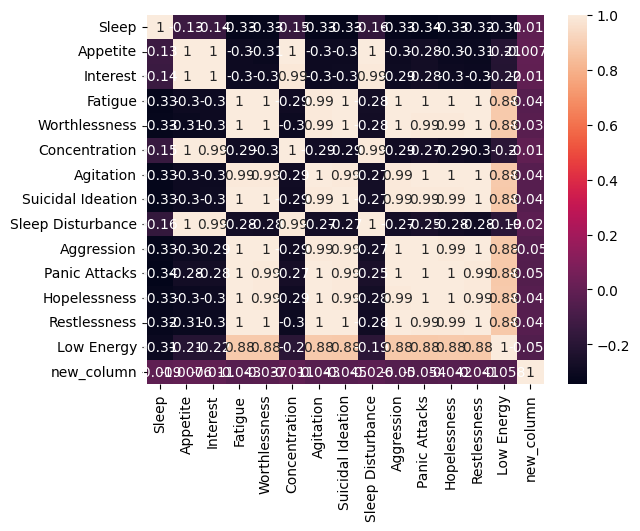

In [18]:
mod_df_3_corr=mod_df_3.corr()
sns.heatmap(mod_df_3_corr,annot=True)

In [23]:
x=mod_df_3.loc[:,mod_df_3.columns != 'new_column']
y=mod_df_3.loc[:,'new_column']

In [24]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.1)

In [50]:
model={'XGBClassifier':XGBClassifier(),'AdaBoostClassifier':AdaBoostClassifier()}
predict1=[]
predict2=[]

for i,j in model.items():
    j.fit(x_train,y_train)
    if i=='XGBClassifier':
       predict1.append(j.predict(x_test))
    else:
      predict2.append(j.predict(x_test))
predict1=np.array(predict1).reshape(-1,1)
predict2=np.array(predict2).reshape(-1,1)

In [46]:
score_xgb =accuracy_score(np.array(predict1).reshape(-1,1), y_test)
score_ada=accuracy_score(np.array(predict2).reshape(-1,1), y_test)

In [53]:
print(f'XGBoostclassifier score is{score_xgb } and the AdaBoostclassifier score is {score_ada}')

XGBoostclassifier score is0.5 and the AdaBoostclassifier score is0.4268292682926829


In [52]:
report_xgb = classification_report(predict1, y_test)
report_ada=classification_report(predict2, y_test)
cm_xgb = confusion_matrix(predict1, y_test)
cm_ada=confusion_matrix(predict2, y_test)

In [54]:
print(report_xgb )

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         1
           1       0.00      0.00      0.00         0
           2       0.00      0.00      0.00         0
           3       0.00      0.00      0.00         1
           6       0.17      0.33      0.22         6
           7       0.64      0.96      0.77        26
           8       0.92      0.28      0.43        43
           9       0.17      0.40      0.24         5

    accuracy                           0.50        82
   macro avg       0.24      0.25      0.21        82
weighted avg       0.71      0.50      0.50        82



In [55]:
print(report_ada)

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         5
           1       0.00      0.00      0.00         0
           2       0.00      0.00      0.00         0
           3       0.00      0.00      0.00         0
           6       0.25      0.33      0.29         9
           7       0.54      0.91      0.68        23
           8       0.69      0.21      0.33        42
           9       0.17      0.67      0.27         3

    accuracy                           0.43        82
   macro avg       0.21      0.27      0.19        82
weighted avg       0.54      0.43      0.40        82



In [62]:
labels_xgb = le.inverse_transform(predict1)
labels_ada = le.inverse_transform(predict2)
labels_y_test=le.inverse_transform(y_test)

In [63]:
cm_xgb = confusion_matrix(labels_xgb,labels_y_test)
cm_ada=confusion_matrix(labels_ada,labels_y_test)

<Axes: >

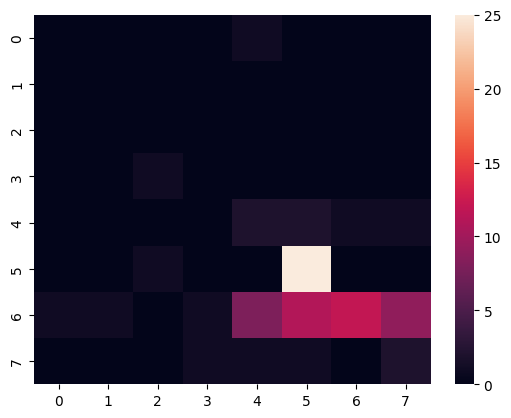

In [64]:
sns.heatmap(cm_xgb)

<Axes: >

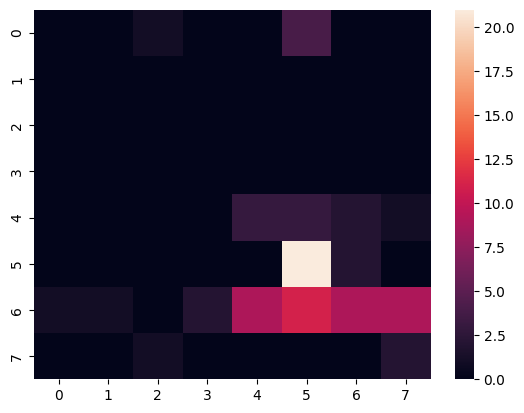

In [65]:
sns.heatmap(cm_ada)